<a href="https://colab.research.google.com/github/tanujashettar/Data-Analysis-and-Visualization-/blob/main/ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1:Data Understanding


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Display first 5 rows
df.head()

# Dataset structure
df.info()

# Numerical & categorical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
Numerical Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


Task2:Data Cleaning Verification

In [8]:
#Missing values check
print("Missing Values:\n", df.isnull().sum())

# Duplicate check
print("Duplicate Rows:", df.duplicated().sum())

# Outlier detection using IQR (example: 'median_house_value')
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['median_house_value'] < Q1 - 1.5*IQR) | (df['median_house_value'] > Q3 + 1.5*IQR)]
print("Outliers Count:", outliers.shape[0])

Missing Values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Duplicate Rows: 0
Outliers Count: 895


Task3:Exploratory Data Analysis (EDA)


In [9]:
#Overall average median house value
overall_avg_house_value = df['median_house_value'].mean()

# Correlation between median income and median house value
correlation = df['median_income'].corr(df['median_house_value'])

# Top 3 houses by median_house_value
top_houses = df.nlargest(3, 'median_house_value')[['longitude', 'latitude', 'median_income', 'median_house_value']]

# Bottom 3 houses by median_house_value
bottom_houses = df.nsmallest(3, 'median_house_value')[['longitude', 'latitude', 'median_income', 'median_house_value']]

print("Overall Average Median House Value:", overall_avg_house_value)
print("\nMedian Income - Median House Value Correlation:", correlation)
print("\nTop 3 Houses by Median House Value:\n", top_houses)
print("\nBottom 3 Houses by Median House Value:\n", bottom_houses)

Overall Average Median House Value: 207300.91235294117

Median Income - Median House Value Correlation: 0.6918706037806693

Top 3 Houses by Median House Value:
      longitude  latitude  median_income  median_house_value
215    -116.43     33.75         3.7727            500001.0
260    -116.55     33.84         5.7613            500001.0
862    -117.08     34.08         3.0625            500001.0

Bottom 3 Houses by Median House Value:
        longitude  latitude  median_income  median_house_value
568      -117.02     36.40         2.1000             14999.0
3226     -117.86     34.24         4.1932             14999.0
16643    -122.74     39.71         1.6607             14999.0


Task4: Data Visualization


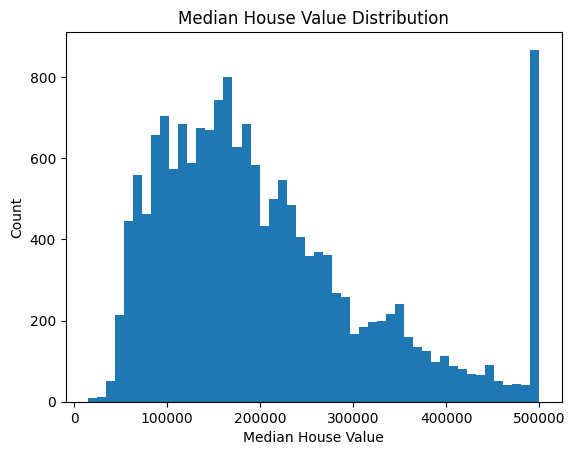

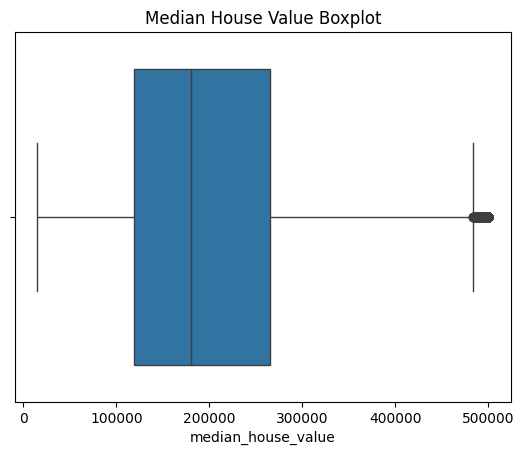

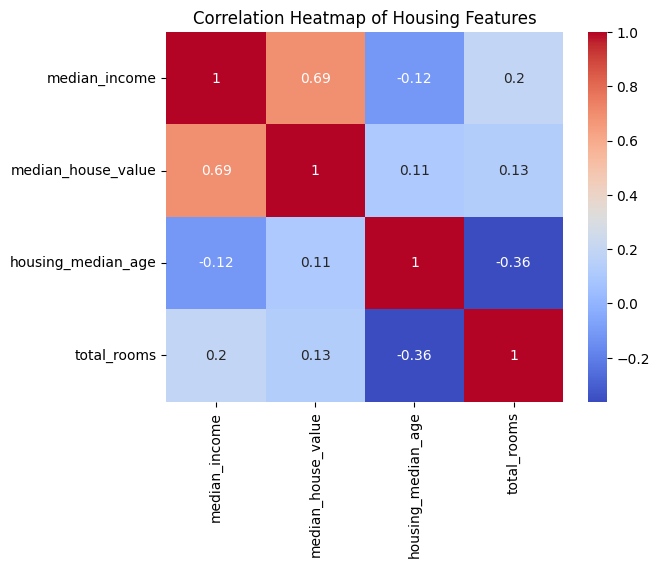

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram – median_house_value
plt.hist(df['median_house_value'], bins=50)
plt.title("Median House Value Distribution")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.show()

# Boxplot – median_house_value
sns.boxplot(x=df['median_house_value'])
plt.title("Median House Value Boxplot")
plt.show()

# Heatmap – Correlation between selected numerical columns
# Select relevant numerical columns for correlation analysis
correlation_cols = ['median_income', 'median_house_value', 'housing_median_age', 'total_rooms']
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Housing Features")
plt.show()